# Which Oxford college is the cheapest?

An obvious question to ask when applying to Oxford is: which Oxford college is the cheapest? Although this data is given by Oxford in the following article, [Do I pay to live in my college?](https://www.ox.ac.uk/admissions/undergraduate/colleges/do-I-pay-to-live-in-my-college), this data is sorted based on colleges' name and not cost.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Getting the data

We have done all the fancy data scraping in our `helpers.py` file. The only thing left is to call the `oxford_table` variable in there.

In [2]:
from helpers import oxford_table

In [3]:
df = oxford_table
df.head()

,college,average_cost (175 days),common_cost_pay,rent_days,meals_cost (175 days),total_cost (175 days)
0,Balliol,4849,5517,189,1405.0,6255
1,Brasenose,4339,4566,186,1241.0,5580
2,Christ Church,4239,4251,175,1743.0,5982
3,Corpus Christi,4080,4106,180,1776.0,5856
4,Exeter,4272,4515,174,1572.0,5843


# 2. Data cleaning

As can be seen in the data types below, the data is quite cleaned already as we have handled some of them when scraping the table. However, there is a row with a `NaN` value; and these figures are given as `int`s so it is sufficient to deal with them in `int`s.

In [4]:
df.dtypes

college                     object
average_cost (175 days)      int64
common_cost_pay              int64
rent_days                    int64
meals_cost (175 days)      float64
total_cost (175 days)        int64
dtype: object

In [5]:
df['meals_cost (175 days)'].fillna(
    df['meals_cost (175 days)'].mean(),
    inplace=True)

In [6]:
df['meals_cost (175 days)'] = df['meals_cost (175 days)'].astype(int)
df.dtypes

college                    object
average_cost (175 days)     int64
common_cost_pay             int64
rent_days                   int64
meals_cost (175 days)       int64
total_cost (175 days)       int64
dtype: object

# 3. Visualizing the data

Fastest way to get insight from data? Visualize them. Let's first define two functions that will make life easier for us.

In [7]:
def prettify_text(text: str) -> str:
    text = text.replace('(', '').replace(')', '').replace('_', ' ')
    cost_idx = text.find('cost')
    if cost_idx > -1:
        shifted_idx = cost_idx + len('cost')
        text = text[:shifted_idx] + ' (£) ' + text[shifted_idx+1:]
    return text.title()

In [8]:
from typing import Tuple

def plot_for(df: pd.DataFrame, column_name: str, figsize: Tuple[int, int] = (12, 12)):
    df = df.sort_values(by=[column_name])
    sns.set(rc={'figure.figsize':figsize})
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
    
    ax = sns.barplot(y='college', x=column_name, data=df, palette="mako")
    ax.set_title(f"Oxford College vs {prettify_text(column_name)}")
    ax.set_xlabel(prettify_text(column_name))
    ax.set_ylabel("Colleges")

## Cheapest based on average accomodation cost: University College

The cheapest Oxford college based on cose of accomodation for 175 days, inlcuding utilities and services is University College.

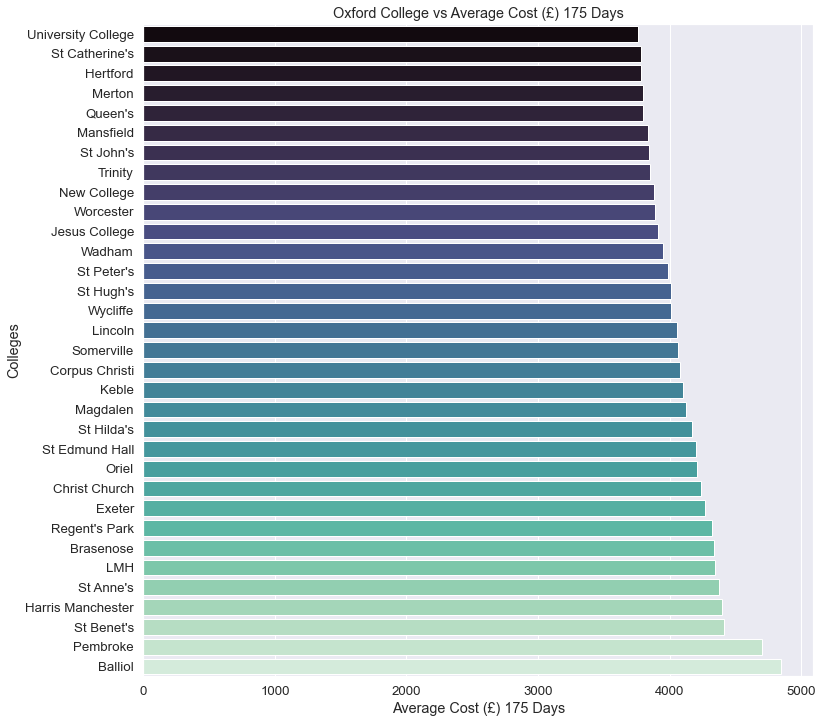

In [9]:
plot_for(df, 'average_cost (175 days)')

## Cheapest based on common rent that student actually pay: Merton

The cheapest Oxford college based on common rent that student actually pay including utilities and services is Merton.

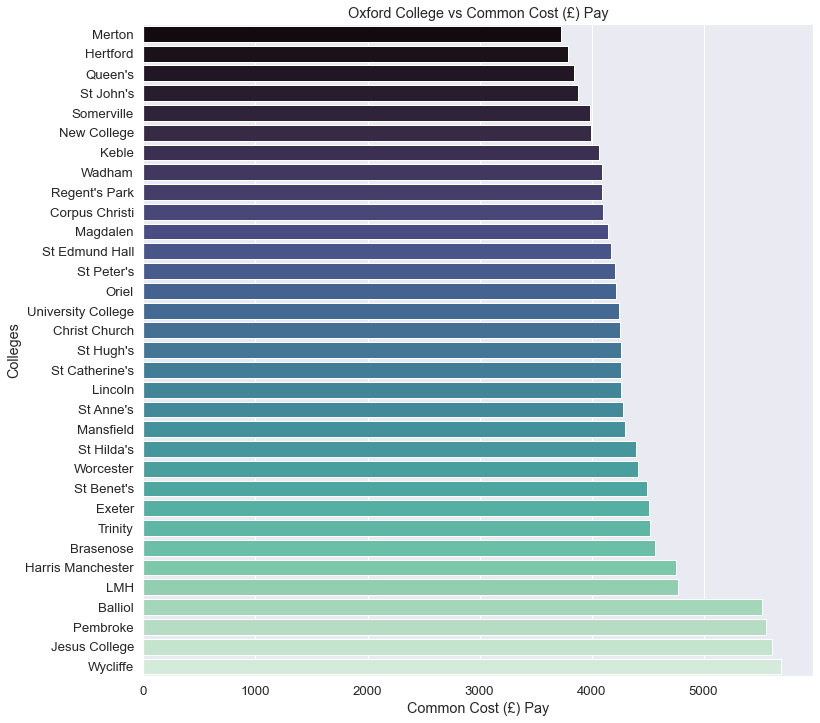

In [10]:
plot_for(df, 'common_cost_pay')

## Cheapest based on meals cost: Pembroke

The cheapest Oxford college based on cost of 3 meals a day for 175 days is Pembroke college

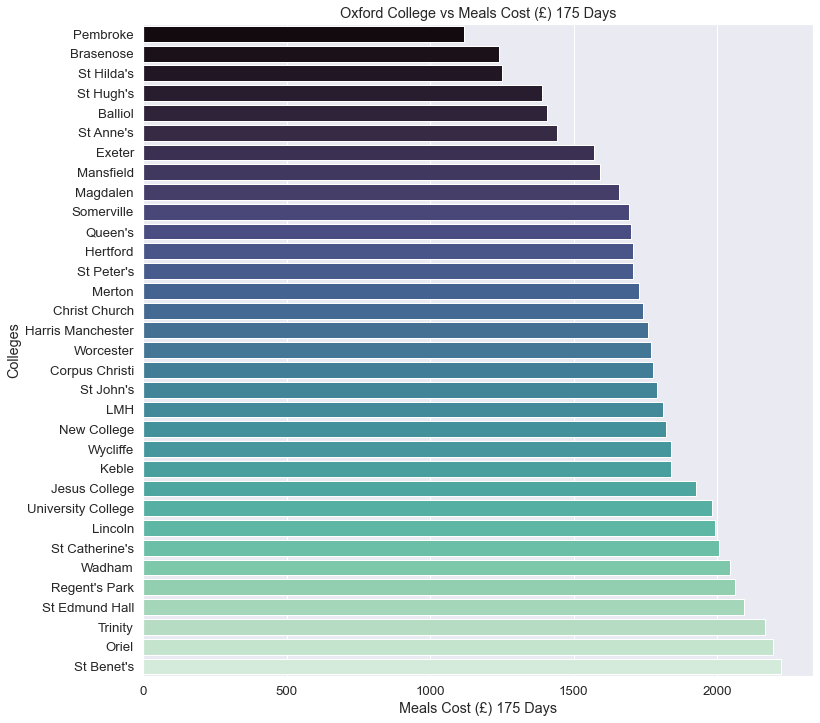

In [11]:
plot_for(df, 'meals_cost (175 days)')

## Cheapest based on total cost: St Hugh's

The cheapest Oxford college based on total cost of accomodation + meals for 175 days is St Hugh's.

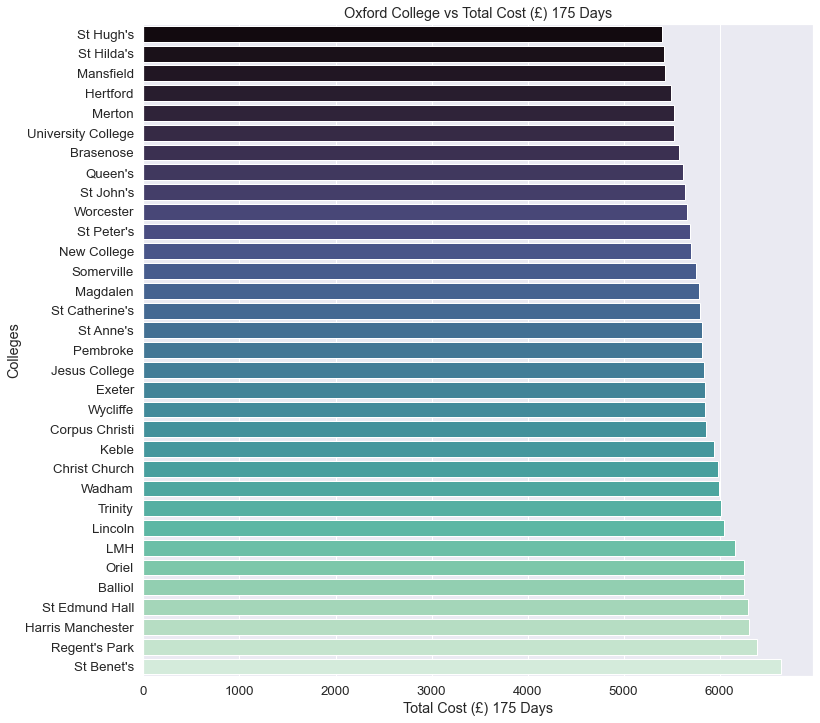

In [12]:
plot_for(df, 'total_cost (175 days)')